In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('bi.csv', encoding='latin1')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [9]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.233766,76.753247,149.714286,75.853333,69.467532
std,10.310822,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [10]:
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

In [11]:
df.shape

(77, 11)

In [12]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

Numeric Columns: ['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB']


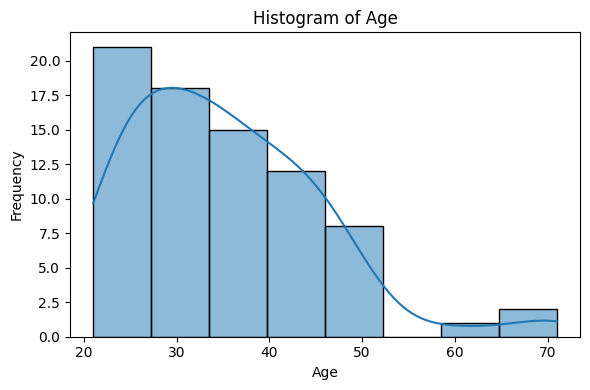

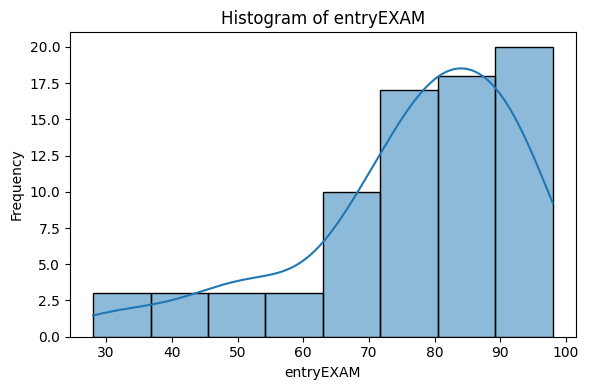

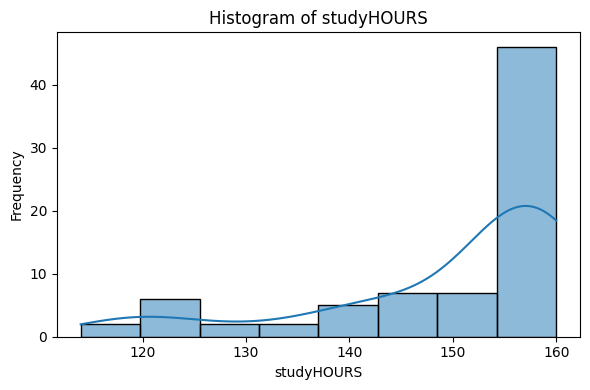

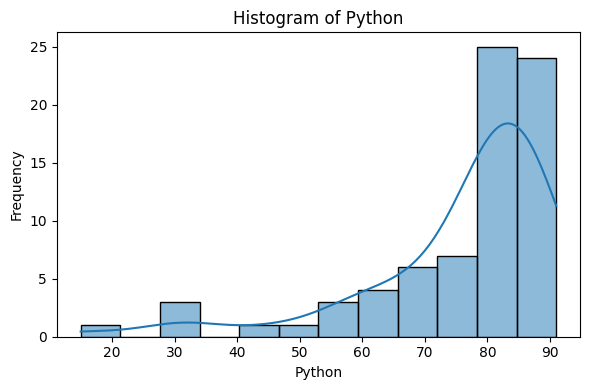

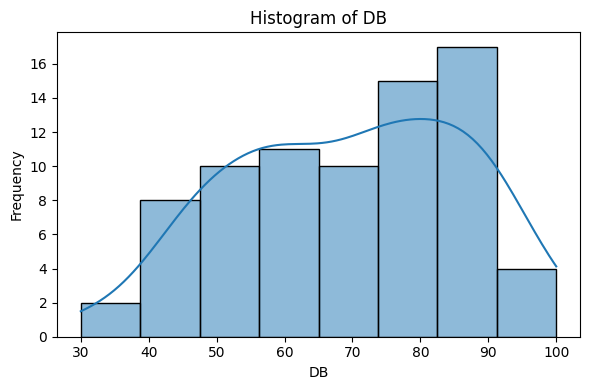

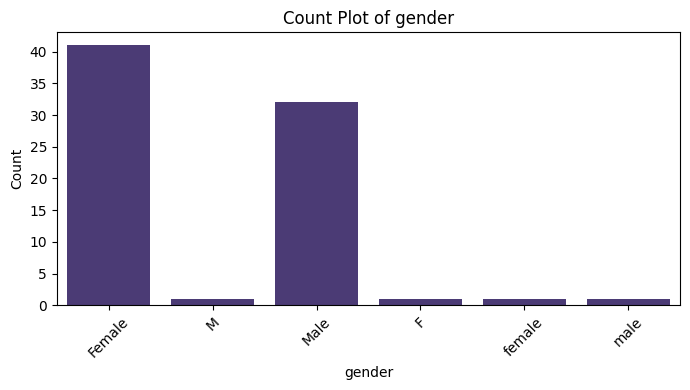

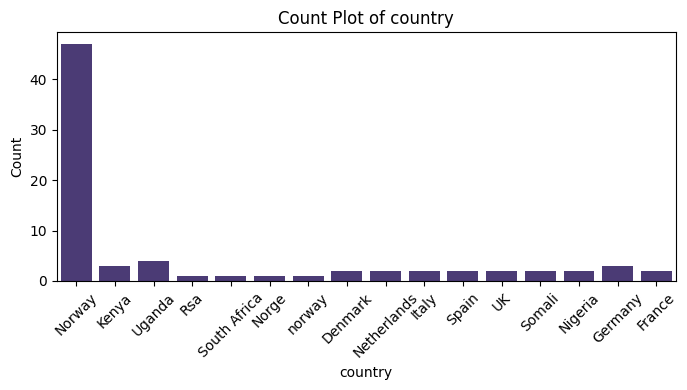

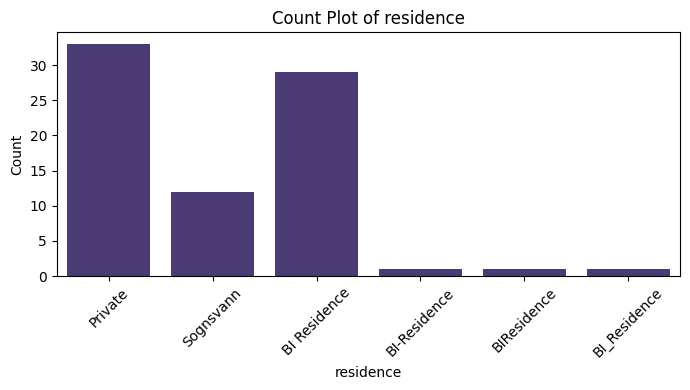

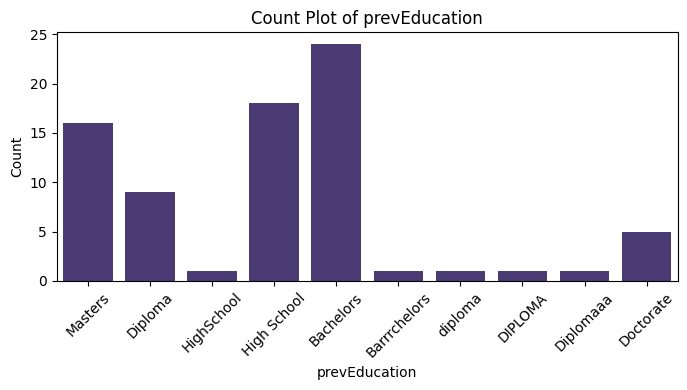

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
print('Numeric Columns:', numeric_df.columns.tolist())

## Histograms for numeric variables
numeric_cols = numeric_df.columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Count plots for categorical variables (gender, country, residence, prevEducation)
categorical_cols = ['gender', 'country', 'residence', 'prevEducation']
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        # Ensure the column is treated as string and remove palette
        sns.countplot(data=df, x=df[col].astype(str), color=sns.color_palette('viridis')[0]) # Using a single color from viridis
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Pair Plot to examine relationships among numeric variables
sns.pairplot(numeric_df)
plt.show()

# Correlation Heatmap - ensure at least 4 numeric columns are available
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(8,6))
    corr = numeric_df.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')